In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import time
import os
import seaborn as sns

In [2]:
df = pd.read_csv("./data/definitivo.csv")
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113 entries, 0 to 1112
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   municipio           1113 non-null   int64  
 1   tipo_vivienda       1113 non-null   int64  
 2   habitaciones        1113 non-null   float64
 3   metros_cuadrados    1113 non-null   float64
 4   aseos               1113 non-null   float64
 5   planta              1113 non-null   float64
 6   garaje              1113 non-null   int64  
 7   zona_centro         1113 non-null   int64  
 8   ascensor            1113 non-null   int64  
 9   piscina             1113 non-null   int64  
 10  reformado           1113 non-null   int64  
 11  terraza             1113 non-null   int64  
 12  aire_acondicionado  1113 non-null   int64  
 13  precio              1113 non-null   float64
dtypes: float64(5), int64(9)
memory usage: 121.9 KB


## En este notebook se realizará la predicción del precio de la vivienda con el modelo **RandomForestRegressor**:

### Este un conjunto de múltiples árboles de decisión (un "bosque"). Utiliza el promedio de las predicciones de todos los árboles para tomar una decisión. Introduce aleatoriedad en dos niveles:

#### ***Selección de muestras*** (mediante bootstrap sampling).
#### ***Selección de subconjuntos de features para dividir los nodos.***
#### + **Ventaja**: Reduce el sobreajuste (overfitting) al promediar los resultados.
#### - **Desventaja**: Es más lento de entrenar y predecir debido a la complejidad del modelo.

## Es más robusto al ruido y menos propenso al sobreajuste gracias al promedio de predicciones de múltiples árboles. La aleatoriedad incorporada ayuda a generalizar mejor en datos de prueba.

In [3]:
df.describe() # Mostramos datos estadisticos descriptivos y nos fijamos principalmente en la media.

,municipio,tipo_vivienda,habitaciones,metros_cuadrados,aseos,planta,garaje,zona_centro,ascensor,piscina,reformado,terraza,aire_acondicionado,precio
count,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.00000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.000000,1113.00000,1.113000e+03
mean,1.762803,3.601977,3.393531,172.386343,1.977538,2.10602,0.197664,0.234501,0.080863,0.018868,0.000898,0.115903,0.01168,3.024951e+05
std,1.043729,1.784898,1.221669,137.437768,0.781093,1.92005,0.398416,0.423877,0.272746,0.136120,0.029975,0.320252,0.10749,2.699383e+05
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.180000e+04
25%,1.000000,2.000000,3.000000,88.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.390000e+05
50%,1.000000,5.000000,3.000000,116.000000,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.200000e+05
75%,3.000000,5.000000,4.000000,210.000000,2.000000,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.500000e+05
max,5.000000,6.000000,11.000000,961.000000,11.000000,15.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.000000e+06


<Axes: >

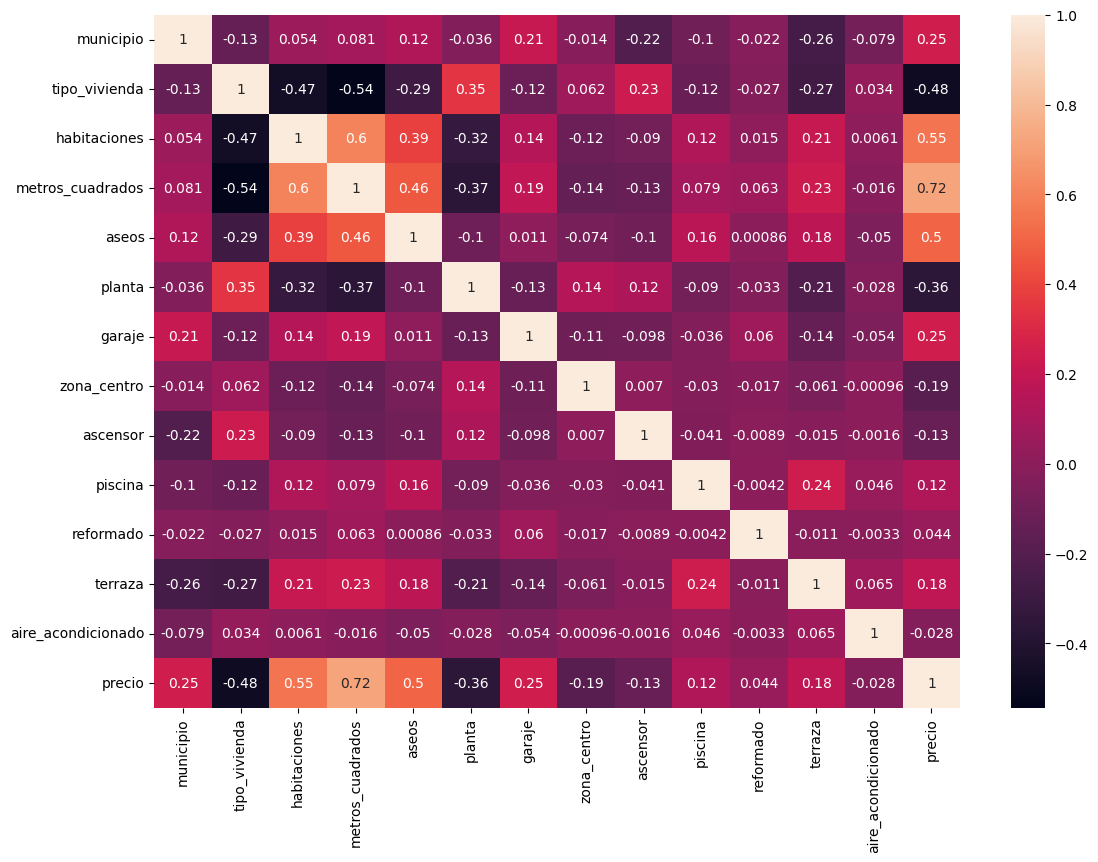

In [4]:
fig = plt.figure(figsize=(13,9))
sns.heatmap(df.corr(), annot=True) # Vemos las correlaciones importantes

### Random Forest **no se ve afectado significativamente por la multicolinealidad.** Esto se debe a cómo funciona el modelo.

<Axes: xlabel='precio', ylabel='Count'>

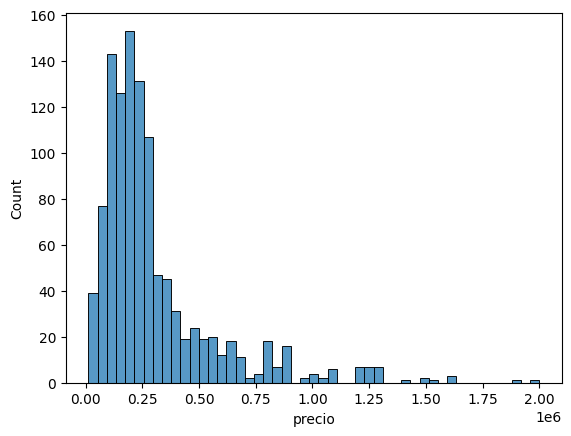

In [5]:
sns.histplot(df["precio"])

## Transformación logarítmica

### En Random Forest **no es necesario realizar una transformación logarítmica** del target ni de las características, ya que este modelo **no asume relaciones lineales ni distribuciones específicas en los datos**, de hecho se ha podido comprobar que es peor todavía. A los modelos como este no le afectan los outliers.

## Normalización

### **Random Forest tampoco requiere normalización**. A diferencia de modelos como Regresión Lineal, Random Forest **no es sensible a la escala de las variables**. 


Total shape: (1113, 13)
Train features shape (X): (890, 13)
Train target shape (y): (890,)
Test features shape (X): (223, 13)
Test target shape (y): (223,)

-----------> MSE: 21208471674.751648
-----------> RMSE: 145631.28673039886
-----------> R2: 0.6252187743062272


<Axes: xlabel='precio'>

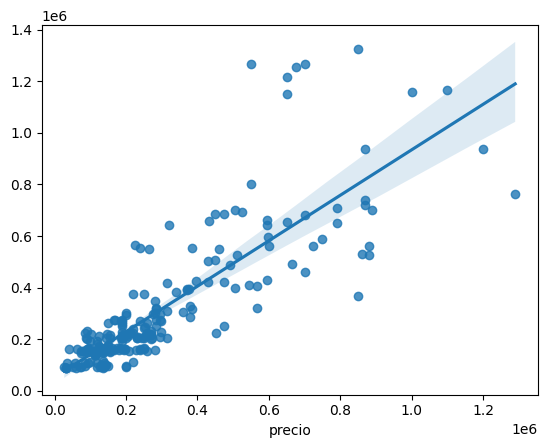

In [19]:
from sklearn.model_selection import train_test_split 

# Las columnas de las features (X)

X = df[['municipio', 'tipo_vivienda', 'habitaciones', 'metros_cuadrados',
       'aseos', 'planta', 'garaje', 'zona_centro', 'ascensor', 'piscina',
       'reformado', 'terraza', 'aire_acondicionado']]

# La columna del target (y)
y = df["precio"]

# Dividimos
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state=42) 

print("Total shape:", X.shape)
print("Train features shape (X):", X_train.shape)
print("Train target shape (y):", y_train.shape)
print("Test features shape (X):", X_test.shape)
print("Test target shape (y):", y_test.shape)
print()

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Instancia el modelo con parámetros básicos
rf = RandomForestRegressor(
    n_estimators=500,      # 500 árboles en el bosque
    max_depth=5,          # Máxima profundidad de 5 niveles
    min_samples_split=5,   # Mínimo 5 muestras para dividir un nodo
    random_state=42,       # Para reproducibilidad
    n_jobs=-1              # Usa todos los núcleos disponibles
)

# Entrena el modelo
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Visualización
sns.regplot(x=y_test, y=y_pred)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("-----------> MAE:", mae)
print("-----------> MAPE:", mape)
print("-----------> RMSE:", rmse)
print("-----------> R2:", r2)

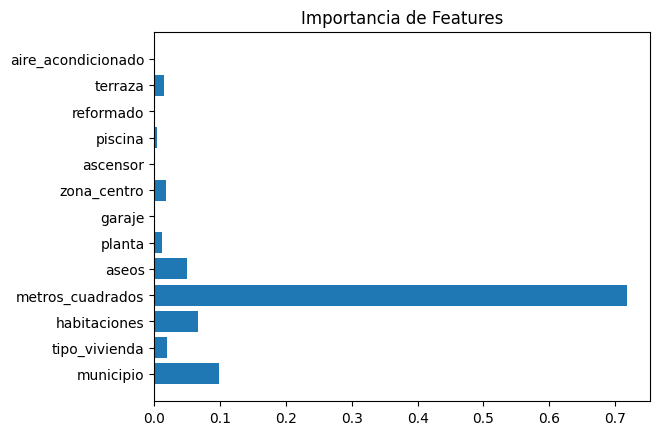

In [20]:
# Calcula la importancia de las características
importances = rf.feature_importances_
features = X.columns

# Ordena las características por importancia
indices = np.argsort(importances)[::-1]  # Orden descendente
sorted_importances = importances[indices]
sorted_features = features[indices]

# Gráfica de barras horizontales
plt.figure(figsize=(8, 4))
plt.barh(sorted_features, sorted_importances)
plt.title("Importancia de Features (Ordenadas)")
plt.gca().invert_yaxis()  # Invierte el eje y para que las más importantes estén arriba
plt.show()

## Vamos a preparar **código para observar outliers**, *posiblemente eliminarlos* y hacer pruebas para ver si mejoran las métricas del modelo sin ellos:

In [24]:
pd.set_option('display.float_format', '{:.2f}'.format) # Para mostrar los numeros completos sin anotacion cientifica

df["precio"].describe()

count      1113.00
mean     302495.07
std      269938.34
min       11800.00
25%      139000.00
50%      220000.00
75%      350000.00
max     2000000.00
Name: precio, dtype: float64

#### Detectamos los valores fuera del rango de los quartiles

In [25]:
Q1 = df["precio"].quantile(0.25)  # Primer cuartil (25%)
Q3 = df["precio"].quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1  # Rango intercuartílico

# Límites para detectar outliers
lower_bound = max(0, Q1 - 1.5 * IQR)  # Ajustar límite inferior a 0 si es negativo
upper_bound = Q3 + 1.5 * IQR

print(f"Valores fuera de los límites: < {lower_bound} o > {upper_bound}")

# Filtrar outliers
outliers = df[df["precio"] > upper_bound]
print(f"Cantidad de outliers detectados: {len(outliers)}")

Valores fuera de los límites: < 0 o > 666500.0
Cantidad de outliers detectados: 101


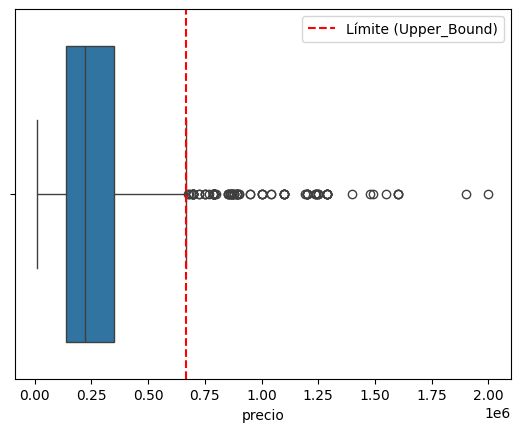

In [26]:
sns.boxplot(x=df["precio"])
plt.axvline(upper_bound, color='r', linestyle='--', label='Límite (Upper_Bound)')
plt.legend()
plt.show()

#### En caso de eliminarlos, ejecutar la siguiente celda para ajustar el limite de los outliers

Límite superior: 666500.0
Límite superior definitivo a filtrar: 1666250.0
Cantidad de outliers detectados ajustados: 2


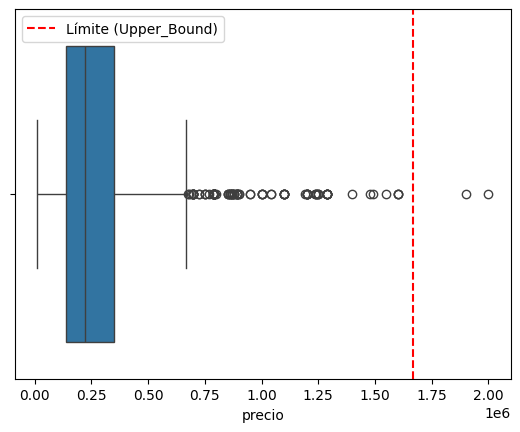

In [29]:
tolerancia = 1  # Incrementa el límite superior del upper_bound (ajusta según tu criterio)
upper_bound_ajustado = upper_bound + (tolerancia * upper_bound)
print(f"Límite superior: {upper_bound}")
print(f"Límite superior definitivo a filtrar: {upper_bound_ajustado}")

# # Filtrar outliers
outliers = df[df["precio"] > upper_bound_ajustado]
print(f"Cantidad de outliers detectados ajustados: {len(outliers)}")

# # Visualizar
sns.boxplot(x=df["precio"])
plt.axvline(upper_bound_ajustado, color='r', linestyle='--', label='Límite (Upper_Bound)')
plt.legend()
plt.show()

#### Eliminamos

In [30]:
# # Filtrar los datos en el df con el límite ajustado
print(f"Cantidad de datos antes de eliminar outliers: {len(df)}")
df = df[df["precio"] <= upper_bound_ajustado]
print(f"Cantidad de datos después de eliminar outliers: {len(df)}")

Cantidad de datos antes de eliminar outliers: 1113
Cantidad de datos después de eliminar outliers: 1111


### **Probamos de nuevo sin los outliers**, si no mejora volvemos al estado anterior en el dataframe, si mejora continuamos!

Total shape: (1111, 13)
Train features shape (X): (888, 13)
Train target shape (y): (888,)
Test features shape (X): (223, 13)
Test target shape (y): (223,)

-----------> MAE: 97264.34542911306
-----------> MAPE: 0.4586836178988161
-----------> RMSE: 142157.58579766183
-----------> R2: 0.6989817067012066


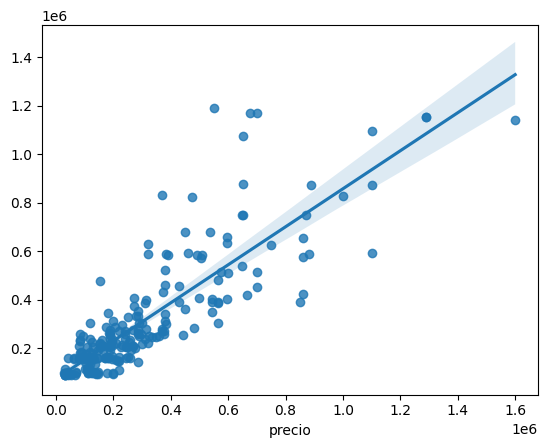

In [35]:
from sklearn.model_selection import train_test_split 

# Las columnas de las features (X)

X = df[['municipio', 'tipo_vivienda', 'habitaciones', 'metros_cuadrados',
       'aseos', 'planta', 'garaje', 'zona_centro', 'ascensor', 'piscina',
       'reformado', 'terraza', 'aire_acondicionado']]

# La columna del target (y)
y = df["precio"]

# Dividimos
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state=42) 

print("Total shape:", X.shape)
print("Train features shape (X):", X_train.shape)
print("Train target shape (y):", y_train.shape)
print("Test features shape (X):", X_test.shape)
print("Test target shape (y):", y_test.shape)
print()

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# Instancia el modelo con parámetros básicos
rf = RandomForestRegressor(
    n_estimators=500,      # 500 árboles en el bosque
    max_depth=5,          # Máxima profundidad de 5 niveles
    min_samples_split=5,   # Mínimo 5 muestras para dividir un nodo
    random_state=42,       # Para reproducibilidad
    n_jobs=-1              # Usa todos los núcleos disponibles
)

# Entrena el modelo
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Visualización
sns.regplot(x=y_test, y=y_pred)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("-----------> MAE:", mae)
print("-----------> MAPE:", mape)
print("-----------> RMSE:", rmse)
print("-----------> R2:", r2)

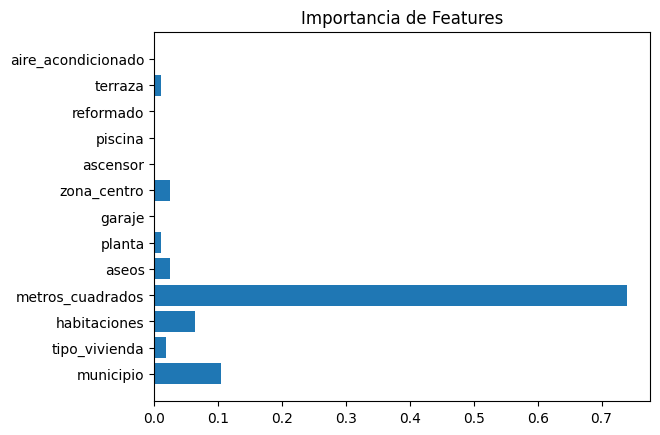

In [32]:
# Calcula la importancia de las características
importances = rf.feature_importances_
features = X.columns

# Ordena las características por importancia
indices = np.argsort(importances)[::-1]  # Orden descendente
sorted_importances = importances[indices]
sorted_features = features[indices]

# Gráfica de barras horizontales
plt.figure(figsize=(8, 4))
plt.barh(sorted_features, sorted_importances)
plt.title("Importancia de Features (Ordenadas)")
plt.gca().invert_yaxis()  # Invierte el eje y para que las más importantes estén arriba
plt.show()

## **Mejora sin outliers!**

### Observamos el R2 obtenido con los parametros establecidos en el modelo y la importancia de cada feature.
### Vamos a eliminar las features menos relevantes y probar nuevamente con el modelo para tratar de extraer una mejor metrica

### TESTER 1

Total shape: (1111, 8)
Train features shape (X): (888, 8)
Train target shape (y): (888,)
Test features shape (X): (223, 8)
Test target shape (y): (223,)

-----------> MAE: 97354.20054862162
-----------> MAPE: 0.45972361003272977
-----------> RMSE: 142384.07346698194
-----------> R2: 0.6980217685936299


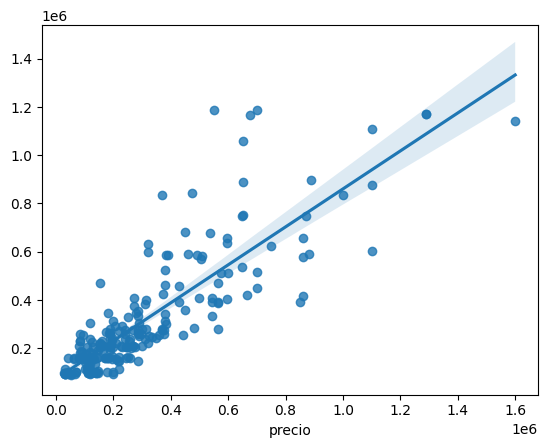

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# Las columnas de las features (X)
'''En esta prueba descartamos las columnas: 'reformado', 'aire_acondicionado', 'piscina', 'ascensor', 'garaje'  '''

X = df[['municipio', 'tipo_vivienda', 'habitaciones', 'metros_cuadrados',
       'aseos', 'planta', 'zona_centro', 'terraza']]

# La columna del target (y)
y = df["precio"]

# Dividimos
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state=42) 

print("Total shape:", X.shape)
print("Train features shape (X):", X_train.shape)
print("Train target shape (y):", y_train.shape)
print("Test features shape (X):", X_test.shape)
print("Test target shape (y):", y_test.shape)
print()

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Instancia el modelo con parámetros básicos
rf = RandomForestRegressor(
    n_estimators=500,      # 500 árboles en el bosque
    max_depth=5,          # Máxima profundidad de 5 niveles
    min_samples_split=5,   # Mínimo 5 muestras para dividir un nodo
    random_state=42,       # Para reproducibilidad
    n_jobs=-1              # Usa todos los núcleos disponibles
)

# Entrena el modelo
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Visualización
sns.regplot(x=y_test, y=y_pred)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("-----------> MAE:", mae)
print("-----------> MAPE:", mape)
print("-----------> RMSE:", rmse)
print("-----------> R2:", r2)

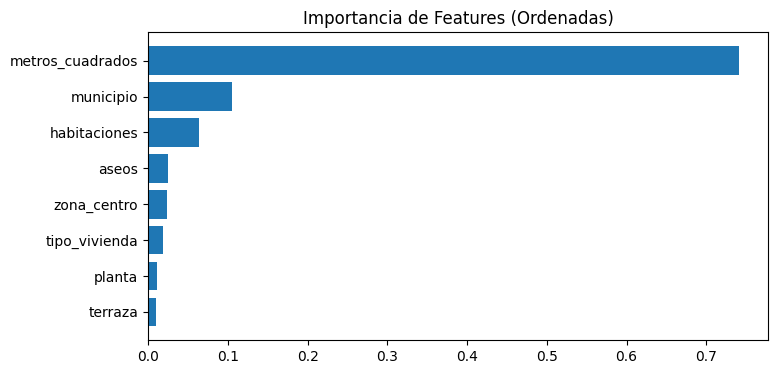

In [48]:
# Calcula la importancia de las características
importances = rf.feature_importances_
features = X.columns

# Ordena las características por importancia
indices = np.argsort(importances)[::-1]  # Orden descendente
sorted_importances = importances[indices]
sorted_features = features[indices]

# Gráfica de barras horizontales
plt.figure(figsize=(8, 4))
plt.barh(sorted_features, sorted_importances)
plt.title("Importancia de Features (Ordenadas)")
plt.gca().invert_yaxis()  # Invierte el eje y para que las más importantes estén arriba
plt.show()


### Prácticamente igual. Vamos a **utilizar RandomizedSearchCV para optimizar** el modelo buscando los **mejores parámetros posibles** con las columnas definitivas.

### TESTER 2

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores hiperparámetros: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}
-----------> MAE: 89228.43914366642
-----------> MAPE: 0.4269526906815742
-----------> RMSE: 143907.91631873333
-----------> R2: 0.6915234321995314


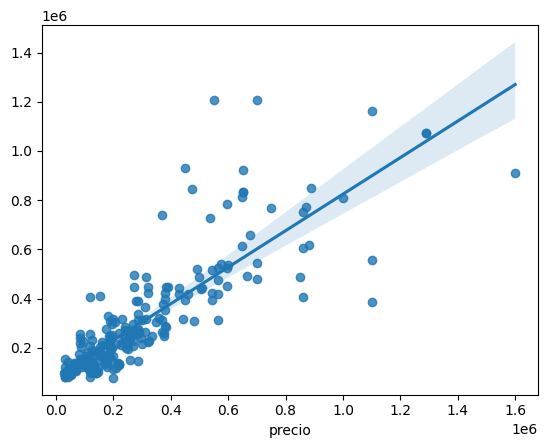

In [61]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define el modelo base
rf = RandomForestRegressor(random_state=42)

# Define el rango de hiperparámetros a optimizar
param_distributions = {
    'n_estimators': [200, 300, 500, 700, 1000],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
}

# Configura RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=50,                  # Número de combinaciones a probar
    scoring='neg_mean_squared_error',  # Métrica a optimizar
    cv=5,                       # Validación cruzada con 5 particiones
    verbose=1,                  # Mostrar progreso
    random_state=42,            # Reproducibilidad
    n_jobs=-1                   # Usa todos los núcleos disponibles
)

# Ajusta RandomizedSearchCV
random_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", random_search.best_params_)

# Usa el mejor modelo encontrado
best_rf = random_search.best_estimator_

# Predicciones con el mejor modelo
y_pred = best_rf.predict(X_test)

# Visualización
sns.regplot(x=y_test, y=y_pred)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("-----------> MAE:", mae)
print("-----------> MAPE:", mape)
print("-----------> RMSE:", rmse)
print("-----------> R2:", r2)

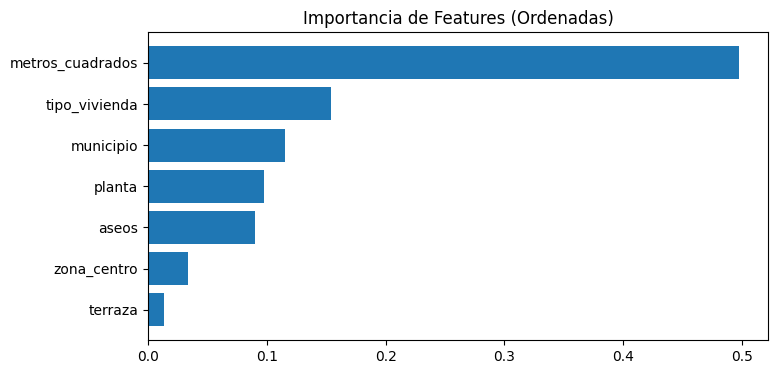

In [58]:
# Calcula la importancia de las características
importances = best_rf.feature_importances_
features = X.columns

# Ordena las características por importancia
indices = np.argsort(importances)[::-1]  # Orden descendente
sorted_importances = importances[indices]
sorted_features = features[indices]

# Gráfica de barras horizontales
plt.figure(figsize=(8, 4))
plt.barh(sorted_features, sorted_importances)
plt.title("Importancia de Features (Ordenadas)")
plt.gca().invert_yaxis()  # Invierte el eje y para que las más importantes estén arriba
plt.show()

### TESTER 3

Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\carlo\miniconda3\envs\data_analysis_env\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast



Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}
-----------> MAE: 89908.55654508148
-----------> MAPE: 0.43959320446131145
-----------> RMSE: 143544.6284768863
-----------> R2: 0.6930789315409986


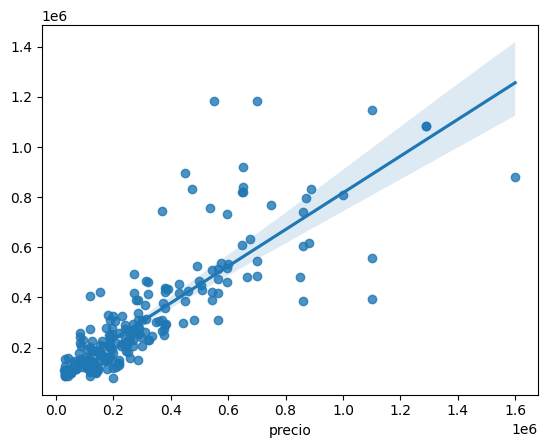

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define el modelo base
rf = RandomForestRegressor(random_state=42)

# Define el rango de hiperparámetros a optimizar
param_grid = {
    'n_estimators': [200, 500, 700],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Configura GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Métrica a optimizar
    cv=5,                              # Validación cruzada con 5 particiones
    verbose=1,
    n_jobs=-1                          # Usa todos los núcleos disponibles
)

# Ajusta GridSearchCV
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Usa el mejor modelo encontrado
best_rf = grid_search.best_estimator_

# Predicciones con el mejor modelo
y_pred = best_rf.predict(X_test)

# Visualización
sns.regplot(x=y_test, y=y_pred)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("-----------> MAE:", mae)
print("-----------> MAPE:", mape)
print("-----------> RMSE:", rmse)
print("-----------> R2:", r2)

In [ ]:
# Calcula la importancia de las características
importances = best_rf.feature_importances_
features = X.columns

# Ordena las características por importancia
indices = np.argsort(importances)[::-1]  # Orden descendente
sorted_importances = importances[indices]
sorted_features = features[indices]

# Gráfica de barras horizontales
plt.figure(figsize=(8, 4))
plt.barh(sorted_features, sorted_importances)
plt.title("Importancia de Features (Ordenadas)")
plt.gca().invert_yaxis()  # Invierte el eje y para que las más importantes estén arriba
plt.show()

### Parece que ya no podemos optimizar mejor el modelo, por lo que **El mejor Score** ha salido en el **TESTER 3**, sin las columnas 'reformado', 'aire_acondicionado', 'piscina', 'ascensor', 'garaje'

### Mejores hiperparámetros: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}

### -----------> MAE: 89908.55654508148
### -----------> MAPE: 0.43959320446131145
### -----------> RMSE: 143544.6284768863
### -----------> R2: 0.6930789315409986

### ***Seguimos probando con DecisionTreeRegressor()***